<a href="https://colab.research.google.com/github/amitshakarchy/big-data-analysis/blob/main/HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Amit Shakarchy

Github link: https://github.com/amitshakarchy/big-data-analysis

# Homework Assignment 7

In [1]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly_express

import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

     |████████████████████████████████| 92.0 MB 1.3 MB/s 
     |████████████████████████████████| 322 kB 42.4 MB/s 
     |████████████████████████████████| 86.4 MB 79 kB/s 
     |████████████████████████████████| 3.5 MB 54.6 MB/s 
     |████████████████████████████████| 3.6 MB 29.5 MB/s 
     |████████████████████████████████| 18.3 MB 448 kB/s 
     |████████████████████████████████| 3.8 MB 31.8 MB/s 
     |████████████████████████████████| 449 kB 66.2 MB/s 
     |████████████████████████████████| 20.1 MB 8.7 MB/s 
     |████████████████████████████████| 2.9 MB 52.8 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=5f4eefb106b82219a69b7cf053162825b92878e8549d371c8ed3ccb631ee8d38
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=52ef27bd33

     |████████████████████████████████| 1.7 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 45.0 MB/s 
     |████████████████████████████████| 11.3 MB 33.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=932dd0e7bc27e81151f7e8bbcfea74f6c86693d22478eb52250bc43b034519b2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take i

     |████████████████████████████████| 52 kB 1.4 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=7b8d12cdb56b7bf0d2c3bbffa05dc82bc6e9631cf6a42dc63413dac1f097db70
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=290c76a9847f19466916ffe176ed954c6bc35df8d016a178658b95f1f6828189
  Stored in directory: /tmp/pip-ephem-wheel-cache-u0gv1xow/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the 

In [1]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"aamitshakarchy","key":"004ade6e43f08b393cf10784d7e16ab0"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


In [2]:
!kaggle datasets list -s "harry potter"

ref                                                          title                                             size  lastUpdated          downloadCount  
-----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
gulsahdemiryurek/harry-potter-dataset                        Harry Potter Dataset                              95KB  2021-05-14 21:30:31           6024  
juliasays/harry-potter-spells                                Harry Potter Spells                               766B  2020-06-22 13:36:53            175  
eward96/harry-potter-and-the-philosophers-stone-script       Harry Potter and the Philosopher's Stone script   25KB  2020-06-17 12:04:00            315  
nehatiwari03/harry-potter-fanfiction-data                    Harry Potter fanfiction data                      86MB  2020-01-25 01:37:25            246  
kornflex/harry-potter-movies-dataset                         Harry Potter Mo

In [3]:
!mkdir ./datasets
!mkdir ./datasets/HP_dataset

!kaggle datasets download zez000/characters-in-harry-potter-books -p ./datasets/HP_dataset
!unzip ./datasets/HP_dataset/*.zip  -d ./datasets/HP_dataset/

  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 22.8MB/s]
Archive:  ./datasets/HP_dataset/characters-in-harry-potter-books.zip
  inflating: ./datasets/HP_dataset/HPCharactersData.csv  
  inflating: ./datasets/HP_dataset/HPCharactersDataRaw.json  


In [4]:
!unzip ./datasets/HP_dataset/characters-in-harry-potter-books.zip  -d ./datasets/HP_dataset/
!ls ./datasets/HP_dataset

Archive:  ./datasets/HP_dataset/characters-in-harry-potter-books.zip
replace ./datasets/HP_dataset/HPCharactersData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/HP_dataset/HPCharactersData.csv  
replace ./datasets/HP_dataset/HPCharactersDataRaw.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/HP_dataset/HPCharactersDataRaw.json  
characters-in-harry-potter-books.zip  HPCharactersDataRaw.json
HPCharactersData.csv


In [5]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/HP_dataset/HPCharactersData.csv")
sf

Read 100 lines. Lines per second: 2088.25

Finished parsing file /content/datasets/HP_dataset/HPCharactersData.csv

Parsing completed. Parsed 100 lines in 0.050516 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/HP_dataset/HPCharactersData.csv

Parsing completed. Parsed 1281 lines in 0.019984 secs.

Name,Link,Descr,Gender,Species/Race
Mrs. Abbott,https://www.hp-lexicon.org/character/abbott- ...,"Mrs. Abbott was themother of Hannah Abbott, ...",Female,witch
Hannah Abbott,https://www.hp-lexicon.org/character/abbott- ...,Hannah Abbott is aHufflepuff student in ...,Female,witch
Abel Treetops,https://www.hp-lexicon.org/character/abel- ...,Abel Treetops was awizard from Cincinnati ...,Male,wizard
Euan Abercrombie,https://www.hp-lexicon.org/character/abercrombie- ...,Euan Abercrombie was asmall boy with prominent ...,Male,wizard
Aberforth Dumbledore,https://www.hp-lexicon.org/character/dumbledore- ...,"Aberforth Dumbledore wasa tall, thin, grumpy- ...",Male,wizard
Abernathy,https://www.hp-lexicon.org/character/abernathy/ ...,Abernathy\xa0was TinaGoldstein’s pompous boss ...,Male,wizard
Abraham Peasegood,https://www.hp-lexicon.org/character/abraham- ...,Abraham Peasegood was anAmerican wizard who ...,Male,wizard
Abraham Potter,https://www.hp-lexicon.org/character/potter- ...,Abraham Potter was one ofMACUSA’s original twelve ...,Male,wizard
Abraxas Malfoy,https://www.hp-lexicon.org/character/malfoy- ...,Abraxas Malfoy was awizard who was believed ...,Male,wizard
Achilles Tolliver,https://www.hp-lexicon.org/character/achilles- ...,Achilles Tolliver was anAuror whom Tina Golds ...,Male,wizard


In [6]:
l_name = list(sf["Name"])
l_school = list(sf["School"])

In [7]:
import networkx as nx

g = nx.Graph()
edge_list = list(zip(l_name,l_school))
print(len(edge_list),edge_list)

1281 [('Mrs. Abbott', 'Unknown'), ('Hannah Abbott', 'Hogwarts - Hufflepuff'), ('Abel Treetops', 'Unknown'), ('Euan Abercrombie', 'Hogwarts - Gryffindor'), ('Aberforth Dumbledore', 'Hogwarts - Student'), ('Abernathy', 'Unknown'), ('Abraham Peasegood', 'Unknown'), ('Abraham Potter', 'Unknown'), ('Abraxas Malfoy', 'Unknown'), ('Achilles Tolliver', 'Unknown'), ('Stewart Ackerley', 'Hogwarts - Ravenclaw'), ('Adalbert Waffling', 'Unknown'), ('Adrian Pucey', 'Hogwarts - Slytherin'), ('Adrian Tutley', 'Unknown'), ('three African wizards', 'Unknown'), ('Agatha Chubb', 'Unknown'), ('Agatha Timms', 'Unknown'), ('Agilbert Fontaine', 'Unknown'), ('Agnes', 'Unknown'), ('Cornelius Agrippa', 'Unknown'), ('Aidan Kiely', 'Unknown'), ('Aidan Lynch', 'Unknown'), ('Alasdair Maddock', 'Unknown'), ('Alastor Gumboil', 'Unknown'), ('Mad-Eye Moody', 'Hogwarts - Staff'), ('Albanian peasant', 'Unknown'), ('Alberic Grunnion', 'Unknown'), ('Alberta Toothill', 'Unknown'), ('Albert Boot', 'Unknown'), ('Albert Jorkins

In [8]:
# remove all unknown places
for tup in edge_list:
  if  'own' in str(tup[1]) or str(tup[1]) == '':
    edge_list.remove(tup)

print(len(edge_list),edge_list)

706 [('Hannah Abbott', 'Hogwarts - Hufflepuff'), ('Euan Abercrombie', 'Hogwarts - Gryffindor'), ('Aberforth Dumbledore', 'Hogwarts - Student'), ('Abraham Peasegood', 'Unknown'), ('Abraxas Malfoy', 'Unknown'), ('Stewart Ackerley', 'Hogwarts - Ravenclaw'), ('Adrian Pucey', 'Hogwarts - Slytherin'), ('three African wizards', 'Unknown'), ('Agatha Timms', 'Unknown'), ('Agnes', 'Unknown'), ('Aidan Kiely', 'Unknown'), ('Alasdair Maddock', 'Unknown'), ('Mad-Eye Moody', 'Hogwarts - Staff'), ('Alberic Grunnion', 'Unknown'), ('Albert Boot', 'Unknown'), ('Albert Runcorn', 'Unknown'), ('Albus Dumbledore', 'Hogwarts - Staff\\Hogwarts - Gryffindor'), ('Albus Potter', 'Hogwarts - Slytherin'), ('Arkie Alderton', 'Unknown'), ('Alecto Carrow', 'Hogwarts - Staff'), ('Alguff the Awful', 'Unknown'), ('Alice Longbottom', 'Unknown'), ('Alicia Spinnet', 'Hogwarts - Gryffindor'), ('Raul Almeida', 'Unknown'), ('Alejandra Alonso', 'Unknown'), ('Alphard Black', 'Hogwarts - Slytherin'), ('Amarillo Lestoat', 'Unknown

In [10]:
g.add_edges_from(edge_list)

print(nx.info(g))
nx.write_gml(g, "harry_potter.gml")

Graph with 728 nodes and 706 edges


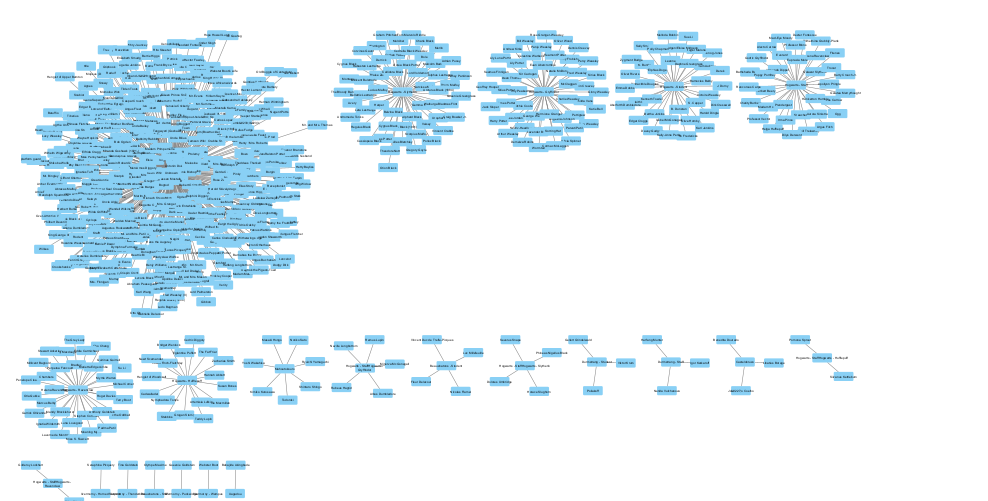

In [13]:
# second book: 
!kaggle datasets list -s "game of thrones"

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
mylesoneill/game-of-thrones                                    Game of Thrones                                    66KB  2016-05-20 01:32:31          34795  
gunnvant/game-of-thrones-srt                                   Game of Thrones Subtitles                         739KB  2018-02-20 10:22:36          44134  
rezaghari/game-of-thrones                                      Game of Thrones                                    25KB  2020-05-02 16:34:34            300  
bakar31/game-of-thronesgot                                     Game of Thrones                                     2KB  2021-06-13 11:48:28            233  
prashant111/game-of-thrones                               

In [14]:
!mkdir ./datasets
!mkdir ./datasets/got

!kaggle datasets download mylesoneill/game-of-thrones -p ./datasets/got
!unzip ./datasets/got/*.zip  -d ./datasets/got/

mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/66.1k [00:00<?, ?B/s]
100% 66.1k/66.1k [00:00<00:00, 4.55MB/s]
Archive:  ./datasets/got/game-of-thrones.zip
  inflating: ./datasets/got/battles.csv  
  inflating: ./datasets/got/character-deaths.csv  
  inflating: ./datasets/got/character-predictions.csv  


In [15]:
import pandas as pd
CSV_PATH = "/content/datasets/got/character-deaths.csv"
df = pd.read_csv(CSV_PATH)
df

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [17]:
l_name = list(df["Name"])
l_school = list(df["Allegiances"])

In [18]:
g = nx.Graph()
edge_list = list(zip(l_name,l_school))
print(len(edge_list),edge_list)

917 [('Addam Marbrand', 'Lannister'), ('Aegon Frey (Jinglebell)', 'None'), ('Aegon Targaryen', 'House Targaryen'), ('Adrack Humble', 'House Greyjoy'), ('Aemon Costayne', 'Lannister'), ('Aemon Estermont', 'Baratheon'), ('Aemon Targaryen (son of Maekar I)', "Night's Watch"), ('Aenys Frey', 'None'), ('Aeron Greyjoy', 'House Greyjoy'), ('Aethan', "Night's Watch"), ('Aggar', 'House Greyjoy'), ('Aggo', 'House Targaryen'), ('Alan of Rosby', "Night's Watch"), ('Alayaya', 'None'), ('Albar Royce', 'Arryn'), ('Albett', "Night's Watch"), ('Alebelly', 'House Stark'), ('Alerie Hightower', 'House Tyrell'), ('Alesander Staedmon', 'Baratheon'), ('Alester Florent', 'Baratheon'), ('Alia of Braavos', 'None'), ('Alla Tyrell', 'House Tyrell'), ('Allard Seaworth', 'Baratheon'), ('Alliser Thorne', "Night's Watch"), ('Alyn', 'House Stark'), ('Alyn Ambrose', 'Tyrell'), ('Alyn Estermont', 'Baratheon'), ('Alyn Stackspear', 'Lannister'), ('Alys Karstark', 'Stark'), ('Alysane Mormont', 'Stark'), ('Alyx Frey', 'None

In [20]:
g.add_edges_from(edge_list)

print(nx.info(g))
nx.write_gml(g, "got.gml")

Graph with 937 nodes and 917 edges


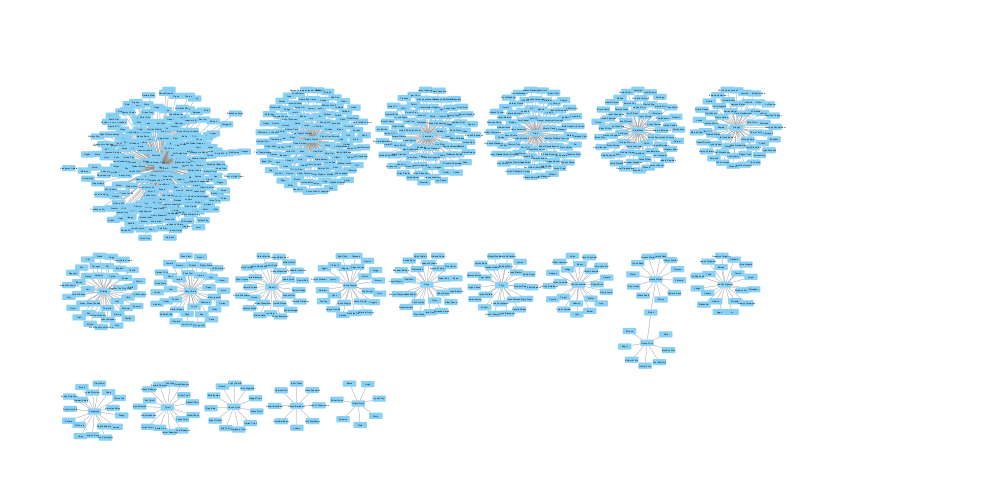

**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [21]:
!kaggle datasets list -s friends

ref                                                     title                                               size  lastUpdated          downloadCount  
------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
hwassner/TwitterFriends                                 Twitter Friends                                    175MB  2016-09-02 13:28:00           2742  
rezaghari/friends-series-dataset                        Friends Series Dataset                              40KB  2021-03-28 10:49:57           1495  
blessondensil294/friends-tv-series-screenplay-script    FRIENDS TV Series - Screenplay Script                2MB  2020-09-14 13:18:19            537  
divyansh22/friends-tv-show-script                       Friends TV Show Script                               2MB  2020-07-13 06:13:57            261  
ruchi798/friends-tv-show-all-seasons-and-episodes-data  Friends TV show: All seasons and episo

In [22]:
!mkdir ./datasets
!mkdir ./datasets/friends_dataset

!kaggle datasets download ryanstonebraker/friends-transcript -p ./datasets/friends_dataset
!unzip ./datasets/friends_dataset/*.zip  -d ./datasets/friends_dataset/

mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/1.72M [00:00<?, ?B/s]
100% 1.72M/1.72M [00:00<00:00, 28.4MB/s]
Archive:  ./datasets/friends_dataset/friends-transcript.zip
  inflating: ./datasets/friends_dataset/friends_quotes.csv  


In [23]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/friends_dataset/friends_quotes.csv")
sf

Read 100 lines. Lines per second: 326.766

Finished parsing file /content/datasets/friends_dataset/friends_quotes.csv

Parsing completed. Parsed 100 lines in 0.308506 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,str,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/friends_dataset/friends_quotes.csv

Parsing completed. Parsed 60291 lines in 0.175527 secs.

author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [24]:
# Use the Friends TV Show Transcript to create and evaluate a classifier that given a line of text 
#can predict who is the "friend" that said it (20pt).

from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_lg')
vector_list = []
for quote in tqdm(sf['quote']):
    vector_list.append(nlp(quote).vector)
sf['vector'] = vector_list
sf

100%|██████████| 60291/60291 [09:29<00:00, 105.93it/s]


author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [48]:
train,test = sf.random_split(0.8)
cls = tc.classifier.create(train[:5000], features=["vector"], target="author") # I took only a portion of the data so the program won't stuck

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 151

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 12.625680    | 0.241053          | 0.212851            | 2.664319          | 3.385149            |

| 2         | 24.102761    | 0.327158          | 0.212851            | 2.178091          | 3.231427            |

| 3         | 35.443699    | 0.448421          | 0.188755            | 1.862946          | 3.177164            |

| 4         | 46.976577    | 0.562105          | 0.164659            | 1.635625          | 3.131626            |

| 5         | 58.212445    | 0.646316          | 0.176707            | 1.452773          | 3.094759            |

| 7         | 80.531419    | 0.772632          | 0.180723            | 1.177131          | 3.047877            |

| 8         | 91.695030    | 0.812842          | 0.180723            | 1.067462          | 3.044730            |

| 9         | 102.856869   | 0.844421          | 0.188755            | 0.978430          | 3.038519            |

| 10        | 114.053290   | 0.873684          | 0.196787            | 0.890822          | 3.029525            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 151

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 9.027695     | 0.240421          | 0.200803            | 4.817222          | 6.796240            |

| 2         | 18.031265    | 0.277053          | 0.200803            | 4.083407          | 5.820568            |

| 3         | 26.958506    | 0.293684          | 0.200803            | 3.917697          | 5.698841            |

| 4         | 35.817518    | 0.308211          | 0.220884            | 3.693607          | 5.451978            |

| 5         | 44.974554    | 0.314105          | 0.220884            | 3.618824          | 5.291179            |

| 7         | 62.784309    | 0.322947          | 0.248996            | 3.485884          | 5.137588            |

| 8         | 71.894884    | 0.318737          | 0.236948            | 3.486758          | 5.165069            |

| 9         | 80.893719    | 0.319789          | 0.224900            | 3.434495          | 5.117460            |

| 10        | 89.866459    | 0.321474          | 0.244980            | 3.413318          | 5.091023            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 151

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 12.648405    | 0.241053          | 0.212851            | 4.269420          | 6.595407            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 151

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 45150

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.825538     | 0.193263          | 0.200000            |

| 1         | 4        | 1.000000  | 2.033297     | 0.173263          | 0.176000            |

| 2         | 9        | 0.558773  | 4.415693     | 0.201474          | 0.212000            |

| 3         | 16       | 7.859838  | 7.571094     | 0.231368          | 0.240000            |

| 4         | 18       | 7.335208  | 8.770215     | 0.195158          | 0.140000            |

| 9         | 34       | 0.947072  | 17.147870    | 0.284632          | 0.256000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.196
PROGRESS: RandomForestClassifier          : 0.244
PROGRESS: DecisionTreeClassifier          : 0.212
PROGRESS: LogisticClassifier              : 0.256
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [49]:
cls.evaluate(test[:1000])

{'accuracy': 0.257, 'auc': nan, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 180
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    Angela    |     Chandler    |   1   |
 |  Mr. Geller  |      Monica     |   3   |
 |     All      |       Joey      |   2   |
 |  Pizza Guy   |      Phoebe     |   2   |
 |    Leslie    |      Monica     |   1   |
 |    Woman     |       Ross      |   2   |
 |  Mrs. Bing   |      Monica     |   1   |
 |     Kiki     |     Chandler    |   1   |
 |    Paula     |       Joey      |   1   |
 |    Carol     |     Chandler    |   1   |
 +--------------+-----------------+-------+
 [180 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.1647980932560064, 'log_loss': 2.972775325753931, 'precision': 0.722105859837946

In [50]:
# Using sentiment analysis identify who are the most and less friendly friends (20pt)

from afinn import Afinn
afinn = Afinn()

sf['score'] = sf['quote'].apply(lambda t: afinn.score(t))
sf

author,episode_number,episode_title,quote,quote_order,season
Monica,1,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [51]:
friendly_dict = {}

for friend in sf:
  f_name = friend["author"]
  score = friendly_dict.setdefault(f_name, 0)
  friendly_dict.update({f_name: score + friend["score"]})


print(friendly_dict)


{'Monica': 3469.0, 'Joey': 3927.0, 'Chandler': 3261.0, 'Phoebe': 3593.0, 'All': 153.0, 'Ross': 3950.0, 'Rachel': 4640.0, 'Waitress': 0.0, 'Phoebe, Ross, Chandler, and Joey': 0.0, 'Paul': 71.0, 'Priest on TV': 1.0, 'Frannie': -3.0, 'Ross and Rachel': 3.0, 'Customer': -6.0, 'Marsha': 1.0, 'Carol': 104.0, 'Chandler and Joey': 6.0, 'Mrs. Geller': 75.0, 'Mr. Geller': 56.0, 'Susan': 53.0, 'Barry': 36.0, 'Robbie': 0.0, 'Bernice': -4.0, 'Dr. Oberman': 1.0, 'Paula': -4.0, 'Alan': 7.0, 'The Guys': 4.0, 'Lizzie': 0.0, 'Guys': -3.0, 'Leslie': 19.0, 'Kiki': 0.0, 'Joanne': 0.0, 'Receptionist': 7.0, 'Pizza Guy': 0.0, 'Monica and Phoebe': 3.0, 'Both': 2.0, 'Kid': -2.0, 'Angela': 8.0, 'Janice': 130.0, 'Woman': 78.0, 'Bob': -5.0, "All you want is a dingle,\r\n What you envy's a schwang,\r\n A thing through which you can tinkle,\r\n Or play with, or simply let hang..": 0.0, 'Aurora': 4.0, 'Director': 22.0, 'Jill': 57.0, 'Monica, Joey, and Phoebe': 4.0, 'Mr. Heckles': 0.0, 'Paolo': 2.0, 'Shelley': 18.0, '

In [52]:
import operator
sorted_dict = sorted(friendly_dict.items(), key=operator.itemgetter(1), reverse=True)

print('the friendliest friend: ', sorted_dict[0])

the friendliest friend:  ('Rachel', 4640.0)


In [53]:
# Construct a classifier that can be given several text lines (quotes)
# from a specific episode that will predict the episode's season number (20pt).

sf["episode_number"] = sf["episode_number"].apply(lambda en: int(en))

train,test = sf.random_split(0.8)
cls = tc.classifier.create(train[:5000], features=["vector"], target="episode_number")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.520954     | 0.437263          | 0.096000            | 2.652348          | 3.076070            |

| 2         | 7.036065     | 0.579158          | 0.132000            | 2.306829          | 3.038459            |

| 3         | 10.512148    | 0.700000          | 0.144000            | 2.011735          | 3.034563            |

| 4         | 14.026239    | 0.772421          | 0.152000            | 1.779540          | 2.999398            |

| 5         | 17.499400    | 0.838316          | 0.168000            | 1.560651          | 2.977561            |

| 7         | 24.405683    | 0.907579          | 0.164000            | 1.226544          | 2.976240            |

| 8         | 27.869303    | 0.922947          | 0.164000            | 1.083002          | 2.978710            |

| 9         | 31.310443    | 0.931158          | 0.164000            | 0.978299          | 2.981068            |

| 10        | 34.766276    | 0.937263          | 0.160000            | 0.880677          | 2.980999            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.631322     | 0.388421          | 0.100000            | 2.249589          | 3.506860            |

| 2         | 5.241239     | 0.501053          | 0.132000            | 1.996509          | 3.193293            |

| 3         | 7.873371     | 0.578105          | 0.132000            | 1.917639          | 3.091416            |

| 4         | 10.502302    | 0.630105          | 0.128000            | 1.892640          | 3.045412            |

| 5         | 13.098703    | 0.661895          | 0.132000            | 1.884724          | 3.039724            |

| 10        | 26.206730    | 0.753053          | 0.136000            | 1.854922          | 2.987490            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.502088     | 0.437263          | 0.096000            | 2.106259          | 3.477150            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 6923

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.204966     | 0.107158          | 0.100000            |

| 1         | 5        | 5.000000  | 0.552164     | 0.158316          | 0.136000            |

| 2         | 6        | 5.000000  | 0.740304     | 0.111368          | 0.112000            |

| 3         | 10       | 2.103245  | 1.141049     | 0.185474          | 0.184000            |

| 4         | 12       | 2.088565  | 1.409064     | 0.174316          | 0.136000            |

| 9         | 19       | 1.000000  | 2.443794     | 0.260632          | 0.164000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.16
PROGRESS: RandomForestClassifier          : 0.136
PROGRESS: DecisionTreeClassifier          : 0.096
PROGRESS: LogisticClassifier              : 0.164
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [56]:
cls.evaluate(test[:2000])

{'accuracy': 0.12, 'auc': 0.6152675714036004, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 455
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      24      |        12       |   7   |
 |      24      |        14       |   2   |
 |      9       |        24       |   4   |
 |      22      |        3        |   4   |
 |      6       |        5        |   6   |
 |      1       |        19       |   2   |
 |      2       |        3        |   4   |
 |      9       |        15       |   1   |
 |      1       |        8        |   1   |
 |      8       |        4        |   1   |
 +--------------+-----------------+-------+
 [455 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.11243338351318644, 'log_loss': 3.7957353446119417, 'precision': 0

In [54]:
def predict_episode(quote):
  sf2 = tc.SFrame()
  sf2['quote'] = [quote]
  pred = cls.classify(sf2)
  return pred['class'][0], pred['probability'][0]

In [55]:
episode, prob = predict_episode('Hello Joey!')
print(f"Quote belongs to episode: {episode} in probability of: {prob}")

episode, prob = predict_episode('Sounds like a date to me.')
print(f"Quote belongs to episode: {episode} in probability of: {prob}")

Quote belongs to episode: 1 in probability of: 0.12836032819132737
Quote belongs to episode: 1 in probability of: 0.12836032819132737
